In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target
)

In [4]:
# 전처리 - 표준점수
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
# 로지스틱 함수(이진 크로스 엔트로피 함수) OVR - One Versus Rest
    # 한 개와 나머지의 형태로 나눔
sc = SGDClassifier(loss='log_loss', max_iter=100)
sc.fit(train_scaled, train_target) # 내부적으로 하나씩 꺼내서
print(sc.score(train_scaled, train_target)) # 학습 세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.9495798319327731
0.825


In [7]:
# paartical_fit(...) : 추가 학습
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 학습 세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.9663865546218487
0.85


In [8]:
sc = SGDClassifier(loss='log_loss', max_iter=10)

train_score = []
test_score = []    

In [9]:
# 299번 돌리면서 과대적합이 되는 시기에 종료

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [10]:
print(test_score)

[0.6, 0.55, 0.7, 0.8, 0.725, 0.65, 0.8, 0.775, 0.625, 0.8, 0.65, 0.7, 0.775, 0.85, 0.775, 0.775, 0.7, 0.775, 0.85, 0.775, 0.775, 0.825, 0.775, 0.75, 0.775, 0.75, 0.825, 0.825, 0.8, 0.725, 0.85, 0.8, 0.8, 0.85, 0.75, 0.75, 0.7, 0.8, 0.825, 0.85, 0.825, 0.85, 0.8, 0.75, 0.8, 0.825, 0.775, 0.825, 0.825, 0.75, 0.8, 0.75, 0.775, 0.825, 0.8, 0.75, 0.85, 0.75, 0.775, 0.825, 0.825, 0.825, 0.825, 0.85, 0.725, 0.825, 0.85, 0.8, 0.725, 0.825, 0.85, 0.825, 0.825, 0.75, 0.85, 0.75, 0.725, 0.825, 0.775, 0.825, 0.825, 0.85, 0.825, 0.775, 0.825, 0.85, 0.85, 0.85, 0.85, 0.75, 0.825, 0.85, 0.85, 0.75, 0.85, 0.85, 0.825, 0.825, 0.825, 0.775, 0.775, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.825, 0.8, 0.825, 0.85, 0.85, 0.85, 0.825, 0.825, 0.775, 0.825, 0.85, 0.825, 0.85, 0.75, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.825, 0.825, 0.775, 0.85, 0.85, 0.85, 0.825, 0.85, 0.85, 0.775, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.85, 0.85, 0.825, 0.85, 0.825, 0.85, 0.8

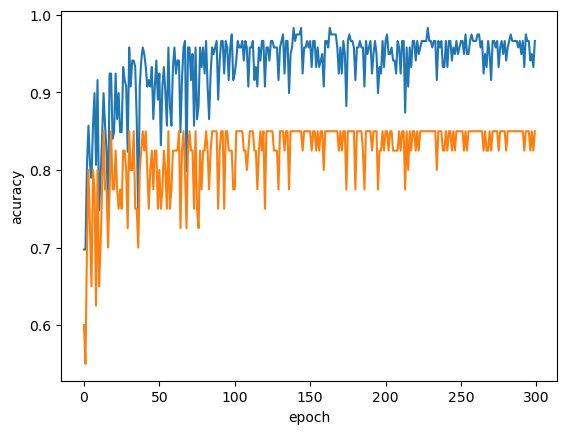

In [11]:
import matplotlib.pyplot as plt
plt.plot(train_score) # 훈련 세트 정확도
plt.plot(test_score) # 테스트 세트 훈련도
plt.xlabel("epoch")
plt.ylabel("acuracy")
plt.show()

In [33]:
# 최소 50번은 반복함
# tol - 기본값 : 0.01, 0.01만큼 정확도가 향상이 안 되면 종료, None 종료
sc = SGDClassifier(loss='log_loss', max_iter=55, tol=None)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.85
